In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
os.chdir('C:/Users/Pavan/Desktop/Marketing_Retail/Assignment/marketbasketanalysis')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#Import files
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
ord_prod_prior = pd.read_csv('order_products__prior.csv')
ord_prod_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [5]:
aisles.head()
aisles.shape

departments.head()
departments.shape

ord_prod_prior.head()
ord_prod_prior.shape

ord_prod_train.head()
ord_prod_train.shape

orders.head()
orders.shape

products.head()
products.shape

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


(134, 2)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


(21, 2)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


(32434489, 4)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


(1384617, 4)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


(3421083, 7)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


(49688, 4)

Text(0.5,1,'Frequency of Day of week Vs Hour of day')

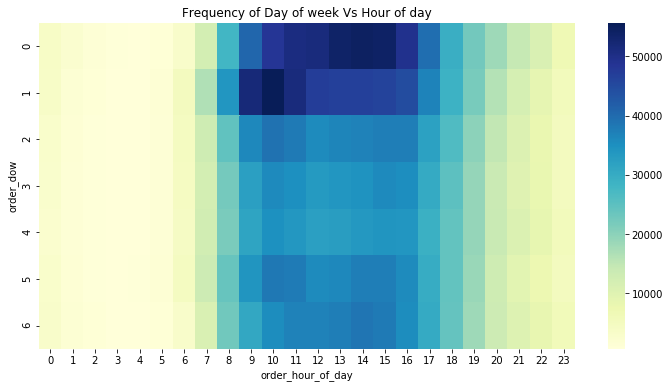

In [6]:
##EDA

#Order frequency

grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df, cmap="YlGnBu")
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

In [7]:
prior = ord_prod_prior[0:300000]

In [8]:
ord_prior = pd.merge(prior,orders,on=['order_id','order_id'])
ord_prior = ord_prior.sort_values(by=['user_id','order_id'])
ord_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
221645,23391,13198,1,1,7,prior,17,0,10,28.0
221646,23391,42803,2,1,7,prior,17,0,10,28.0
221647,23391,8277,3,1,7,prior,17,0,10,28.0
221648,23391,37602,4,1,7,prior,17,0,10,28.0
221649,23391,40852,5,1,7,prior,17,0,10,28.0


In [9]:
products = pd.merge(products,departments,on=['department_id','department_id'])
_mt = pd.merge(prior,products, on = ['product_id','product_id'])
_mt = pd.merge(_mt,orders,on=['order_id','order_id'])
mt = pd.merge(_mt,aisles,on=['aisle_id','aisle_id'])
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,dairy eggs,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,dairy eggs,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,dairy eggs,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,dairy eggs,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,dairy eggs,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,dairy eggs,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,dairy eggs,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,dairy eggs,108932,prior,16,1,13,3.0,eggs


Text(0,0.5,'Number of Occurrences')

Text(0.5,0,'Aisle')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

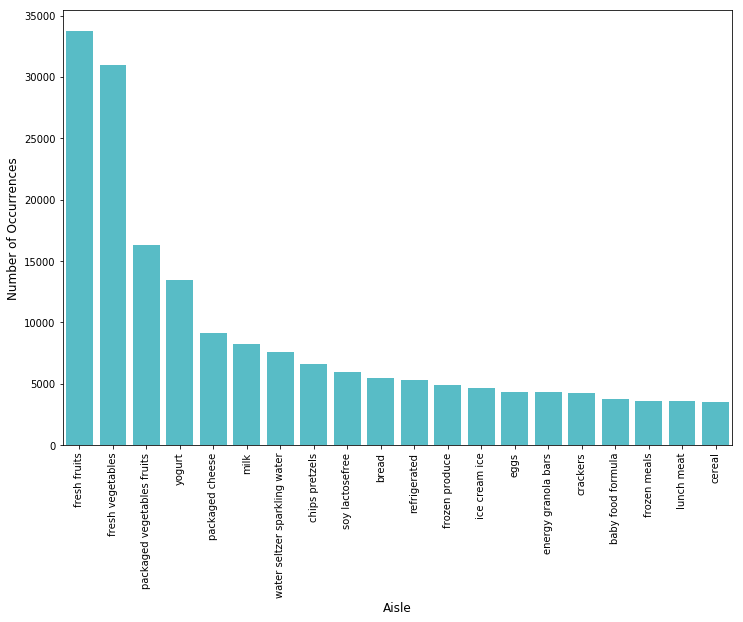

In [10]:
# Aisle ditribution

cnt_srs = mt['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[9])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

([<matplotlib.patches.Wedge at 0x27919bd5eb8>,
 [Text(-0.336912,-1.04713,'produce'),
  Text(0.993266,-0.472675,'dairy eggs'),
  Text(1.02756,0.392584,'snacks'),
  Text(0.677775,0.866384,'beverages'),
  Text(0.203321,1.08105,'frozen'),
  Text(-0.232254,1.0752,'pantry'),
  Text(-0.534952,0.961159,'bakery'),
  Text(-0.729146,0.823617,'canned goods'),
  Text(-0.881402,0.658127,'deli'),
  Text(-0.986877,0.485874,'dry goods pasta'),
  Text(-1.04906,0.330876,'household'),
  Text(-1.08495,0.181318,'breakfast'),
  Text(-1.09961,0.0293326,'meat seafood'),
  Text(-1.09585,-0.0954806,'personal care'),
  Text(-1.08332,-0.19085,'babies'),
  Text(-1.06734,-0.266035,'international'),
  Text(-1.05563,-0.309282,'alcohol'),
  Text(-1.04769,-0.335186,'pets'),
  Text(-1.04162,-0.353587,'missing'),
  Text(-1.03779,-0.364681,'other'),
  Text(-1.03504,-0.372409,'bulk')],
 [Text(-0.18377,-0.571164,'29.0%'),
  Text(0.541782,-0.257823,'16.8%'),
  Text(0.560487,0.214137,'9.0%'),
  Text(0.369696,0.472573,'8.3%'),


Text(0.5,1,'Departments distribution')

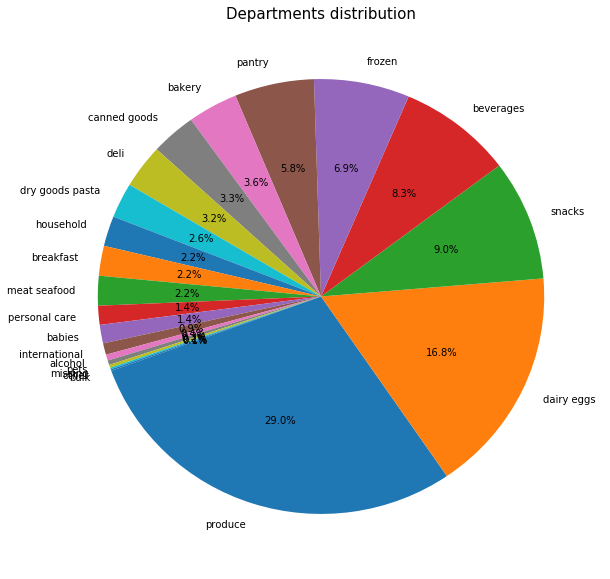

In [11]:
# Department Distribution

plt.figure(figsize=(10,10))
temp_series = mt['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

In [12]:
mt['product_name'].value_counts()

Banana                                                     4432
Bag of Organic Bananas                                     3563
Organic Strawberries                                       2370
Organic Baby Spinach                                       2242
Organic Hass Avocado                                       1985
Organic Avocado                                            1626
Large Lemon                                                1380
Strawberries                                               1343
Organic Raspberries                                        1293
Limes                                                      1270
Organic Whole Milk                                         1231
Organic Garlic                                             1011
Organic Yellow Onion                                       1007
Cucumber Kirby                                              927
Organic Blueberries                                         910
Organic Zucchini                        

In [13]:
len(mt['aisle'].unique())

134

In [14]:
mt['aisle'].value_counts()[0:10]

fresh fruits                     33755
fresh vegetables                 31004
packaged vegetables fruits       16319
yogurt                           13477
packaged cheese                   9133
milk                              8254
water seltzer sparkling water     7634
chips pretzels                    6581
soy lactosefree                   5965
bread                             5457
Name: aisle, dtype: int64

In [15]:
ord_prod = pd.crosstab(mt['order_id'], mt['aisle'])
ord_prod.head()
ord_prod.shape

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(29724, 134)

In [16]:
def cod(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [17]:
ord_set = ord_prod.applymap(cod)
ord_set.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
10,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Frequent itemsets

from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(ord_set, min_support=0.05, use_colnames=True)

In [19]:
frequent_itemsets.head(10)

,support,itemsets
0,0.076470,[baking ingredients]
1,0.165590,[bread]
2,0.069607,[breakfast bakery]
3,0.074048,[butter]
4,0.069338,[candy chocolate]
5,0.073375,[canned jarred vegetables]
6,0.069203,[canned meals beans]
7,0.093594,[cereal]
8,0.166297,[chips pretzels]
9,0.057529,[coffee]


In [20]:
#Rules to find association among products

from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(canned jarred vegetables),(fresh vegetables),0.073375,0.442639,0.056890,0.775332,1.751614,0.024411,2.480825
1,(fresh vegetables),(canned jarred vegetables),0.442639,0.073375,0.056890,0.128525,1.751614,0.024411,1.063283
2,(juice nectars),(fresh fruits),0.091004,0.557832,0.056453,0.620333,1.112042,0.005688,1.164620
3,(fresh fruits),(juice nectars),0.557832,0.091004,0.056453,0.101200,1.112042,0.005688,1.011344
4,"(fresh fruits, chips pretzels)",(fresh vegetables),0.103149,0.442639,0.060927,0.590672,1.334433,0.015269,1.361649


In [21]:
#Top 20 rules with highest Lift

rules.sort_values('lift', ascending=False).head(20)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
237,"(fresh fruits, fresh vegetables)",(fresh herbs),0.317521,0.090634,0.060658,0.191036,2.107781,0.031880,1.124112
240,(fresh herbs),"(fresh fruits, fresh vegetables)",0.090634,0.317521,0.060658,0.669265,2.107781,0.031880,2.063522
241,(fresh vegetables),"(fresh fruits, fresh herbs)",0.442639,0.068901,0.060658,0.137037,1.988915,0.030160,1.078957
236,"(fresh fruits, fresh herbs)",(fresh vegetables),0.068901,0.442639,0.060658,0.880371,1.988915,0.030160,4.659083
223,"(fresh fruits, packaged vegetables fruits)","(soy lactosefree, fresh vegetables)",0.271666,0.095142,0.050565,0.186130,1.956340,0.024718,1.111797
222,"(soy lactosefree, fresh vegetables)","(fresh fruits, packaged vegetables fruits)",0.095142,0.271666,0.050565,0.531471,1.956340,0.024718,1.554512
301,(fresh vegetables),(fresh herbs),0.442639,0.090634,0.077311,0.174660,1.927094,0.037193,1.101808
300,(fresh herbs),(fresh vegetables),0.090634,0.442639,0.077311,0.853007,1.927094,0.037193,3.791744
224,"(fresh fruits, fresh vegetables)","(soy lactosefree, packaged vegetables fruits)",0.317521,0.083333,0.050565,0.159250,1.910998,0.024105,1.090296
221,"(soy lactosefree, packaged vegetables fruits)","(fresh fruits, fresh vegetables)",0.083333,0.317521,0.050565,0.606782,1.910998,0.024105,1.735626


In [22]:
rules[(rules['lift'] >= 1.4) &
      (rules['confidence'] > 0.6) &
      (rules['support'] > 0.1)]

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
38,"(fresh fruits, packaged vegetables fruits)",(fresh vegetables),0.271666,0.442639,0.186953,0.688173,1.554706,0.066703,1.787407
40,"(packaged vegetables fruits, fresh vegetables)",(fresh fruits),0.233448,0.557832,0.186953,0.800836,1.435622,0.056729,2.220118
180,"(fresh fruits, packaged cheese)",(fresh vegetables),0.157146,0.442639,0.105639,0.672233,1.518694,0.036080,1.700479
200,"(yogurt, fresh fruits)",(fresh vegetables),0.188064,0.442639,0.117649,0.625581,1.413299,0.034405,1.488604
201,"(yogurt, fresh vegetables)",(fresh fruits),0.144395,0.557832,0.117649,0.814772,1.460604,0.037101,2.387151
246,(packaged vegetables fruits),(fresh vegetables),0.366875,0.442639,0.233448,0.636314,1.437545,0.071054,1.532532
281,"(milk, fresh vegetables)",(fresh fruits),0.125421,0.557832,0.100794,0.803648,1.440663,0.030830,2.251915
365,"(yogurt, packaged vegetables fruits)",(fresh fruits),0.126026,0.557832,0.103687,0.822744,1.474896,0.033386,2.494520
